<a href="https://colab.research.google.com/github/Art9521/Art9521/blob/main/%227_3_Data_Science%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу данных фильмов из практической части урока, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

In [1]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

In [2]:
with open('the_movies_dataset.zip', 'wb') as f:
    f.write(response.content)

In [3]:
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [4]:
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

In [5]:
# Для работы с файлами
import os

os.listdir(FILE_PATH)

['credits.csv',
 'keywords.csv',
 'ratings_small.csv',
 'ratings.csv',
 'links.csv',
 'links_small.csv',
 'movies_metadata.csv']

In [6]:
# Отключим предупреждения Python, чтобы не захламлять лишним выводом наш Блокнот
import warnings
warnings.filterwarnings('ignore')

In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей
import ast # Импорт библиотеки ast для преобразования строк в объекты Python
import json

In [20]:
movies_metadata = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [21]:
movies_metadata = movies_metadata.drop(['imdb_id'], axis=1)
movies_metadata = movies_metadata.drop(['adult'], axis=1)
movies_metadata = movies_metadata.drop(['belongs_to_collection'], axis=1)
movies_metadata = movies_metadata.drop(['homepage'], axis=1)
movies_metadata = movies_metadata.drop(['video'], axis=1)
movies_metadata = movies_metadata.drop(['poster_path'], axis=1)
movies_metadata = movies_metadata.drop(['production_companies'], axis=1)

In [22]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   original_language     45455 non-null  object 
 4   original_title        45466 non-null  object 
 5   overview              44512 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_countries  45463 non-null  object 
 8   release_date          45379 non-null  object 
 9   revenue               45460 non-null  float64
 10  runtime               45203 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  status                45379 non-null  object 
 13  tagline               20412 non-null  object 
 14  title                 45460 non-null  object 
 15  vote_average       

In [23]:
movies_metadata[movies_metadata['release_date'] == 0].shape

(0, 17)

In [24]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [65]:
credits = pd.read_csv(f'{FILE_PATH}/credits.csv', encoding='utf-8', quotechar='"', escapechar='\\', delimiter=',')

# Проверка первых строк файла credits.csv для анализа структуры данных
print("Первые строки файла 'credits.csv':")
print(credits.head(10))

# Проверка типов данных в 'credits.csv'
print("Типы данных в 'credits.csv':")
print(credits.dtypes)

# Пример данных из столбца 'cast'
example_cast = credits['cast'].iloc[0]
print("Пример данных из столбца 'cast':")
print(example_cast)

Первые строки файла 'credits.csv':
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   
5  [{'cast_id': 25, 'character': 'Lt. Vincent Han...   
6  [{'cast_id': 1, 'character': 'Linus Larrabee',...   
7  [{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...   
8  [{'cast_id': 1, 'character': 'Darren Francis T...   
9  [{'cast_id': 1, 'character': 'James Bond', 'cr...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c750

In [66]:
# Преобразование строковых представлений списков в объекты
def parse_json(x):
    try:
        return json.loads(x.replace("'", "\""))
    except:
        return []

credits['cast'] = credits['cast'].apply(parse_json)
credits['crew'] = credits['crew'].apply(parse_json)

# Проверка корректного преобразования данных
print("Пример данных из столбца 'cast' после преобразования:")
print(credits['cast'].head(10))

Пример данных из столбца 'cast' после преобразования:
0                                                   []
1                                                   []
2    [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3                                                   []
4    [{'cast_id': 1, 'character': 'George Banks', '...
5                                                   []
6                                                   []
7    [{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...
8                                                   []
9                                                   []
Name: cast, dtype: object


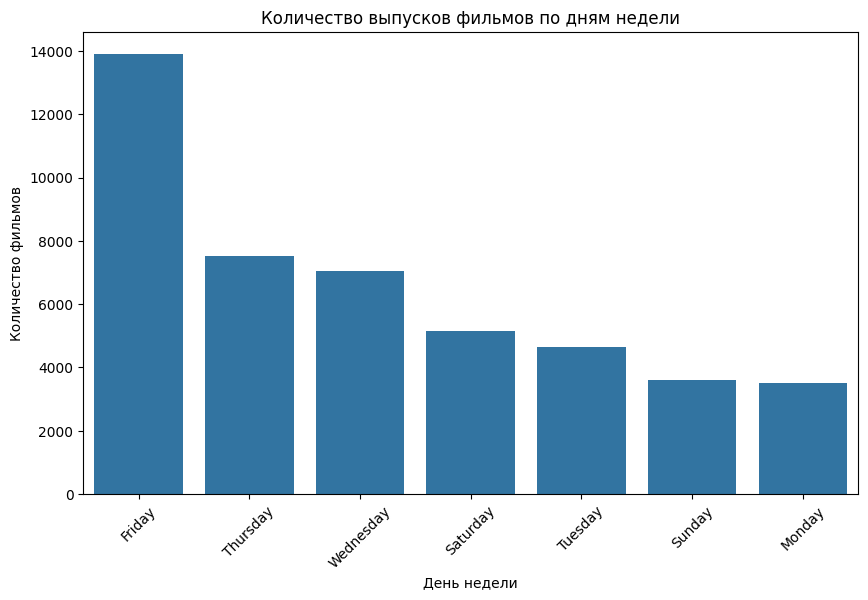

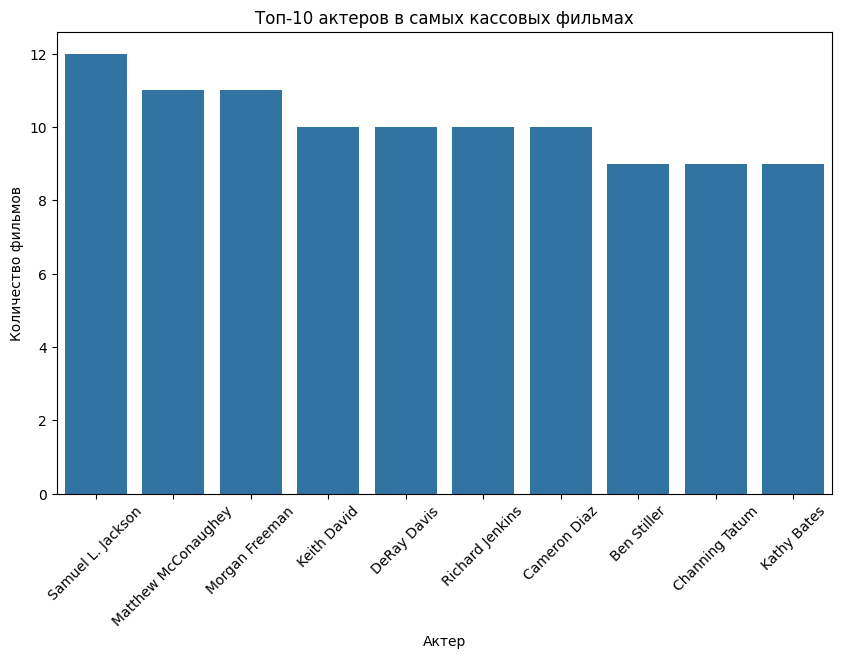

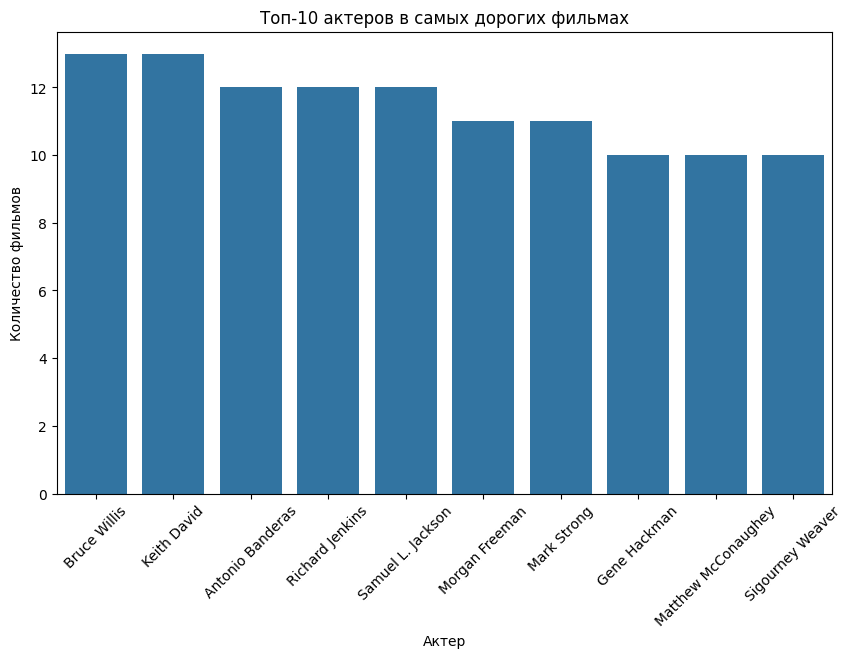

Известные актеры в самых кассовых фильмах: Index(['Samuel L. Jackson', 'Matthew McConaughey', 'Morgan Freeman',
       'Keith David', 'DeRay Davis', 'Richard Jenkins', 'Cameron Diaz',
       'Ben Stiller', 'Channing Tatum', 'Kathy Bates'],
      dtype='object', name='cast')
Известные актеры в самых дорогих фильмах: Index(['Bruce Willis', 'Keith David', 'Antonio Banderas', 'Richard Jenkins',
       'Samuel L. Jackson', 'Morgan Freeman', 'Mark Strong', 'Gene Hackman',
       'Matthew McConaughey', 'Sigourney Weaver'],
      dtype='object', name='cast')


In [68]:
# Заполнение пропущенных значений в столбце id и преобразование в строковый тип
movies_metadata['id'] = movies_metadata['id'].fillna(-1).astype(int).astype(str)
credits['id'] = credits['id'].astype(str)

# Предобработка данных
# Преобразование столбца release_date в формат datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

# Удаление строк с некорректной датой
movies_metadata = movies_metadata.dropna(subset=['release_date'])

# Извлечение дня недели из даты выхода
movies_metadata['release_day'] = movies_metadata['release_date'].dt.day_name()

# Гипотеза 1: Большинство фильмов выпускаются по пятницам
release_days = movies_metadata['release_day'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=release_days.index, y=release_days.values)
plt.title('Количество выпусков фильмов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

# Слияние датасетов по идентификатору фильма
movies_credits = movies_metadata.merge(credits, left_on='id', right_on='id', how='left')

# Преобразование столбцов с бюджетом и выручкой в числовой формат
movies_credits['budget'] = pd.to_numeric(movies_credits['budget'], errors='coerce')
movies_credits['revenue'] = pd.to_numeric(movies_credits['revenue'], errors='coerce')

# Фильтрация самых кассовых фильмов (top 10% по выручке)
top_revenue_movies = movies_credits[movies_credits['revenue'] > movies_credits['revenue'].quantile(0.9)]

# Фильтрация самых дорогих фильмов (top 10% по бюджету)
top_budget_movies = movies_credits[movies_credits['budget'] > movies_credits['budget'].quantile(0.9)]

# Извлечение актеров из самых кассовых фильмов
top_revenue_actors = top_revenue_movies['cast'].explode().apply(lambda x: x['name'] if isinstance(x, dict) else None).dropna().value_counts().head(10)

# Извлечение актеров из самых дорогих фильмов
top_budget_actors = top_budget_movies['cast'].explode().apply(lambda x: x['name'] if isinstance(x, dict) else None).dropna().value_counts().head(10)

# Построение графиков по гипотезам
plt.figure(figsize=(10,6))
sns.barplot(x=top_revenue_actors.index, y=top_revenue_actors.values)
plt.title('Топ-10 актеров в самых кассовых фильмах')
plt.xlabel('Актер')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top_budget_actors.index, y=top_budget_actors.values)
plt.title('Топ-10 актеров в самых дорогих фильмах')
plt.xlabel('Актер')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

# Сколько актеров из результата вам знакомы?
known_actors_revenue = top_revenue_actors.index
known_actors_budget = top_budget_actors.index

print("Известные актеры в самых кассовых фильмах:", known_actors_revenue)
print("Известные актеры в самых дорогих фильмах:", known_actors_budget)